# Subpart 6: Visualisation of Primary, Secondary and Tertiary cases

Importing required libraries:
*  pd is used for dataframe manipulation
*  re is used to form ReGex to be used to find secondary cases
*  plt and gpd are used to plot everything on a map

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import re
import geopandas as gpd

Reading the shape file map of India with its states

In [2]:
fp = "Indian_States.shp"
map_df = gpd.read_file(fp)
map_df['st_nm']=map_df['st_nm'].replace({'NCT of Delhi':'Delhi'})

Extracting data from the csv file

In [3]:
ind_cases=pd.read_csv('IndividualDetails.csv',parse_dates=['diagnosed_date'], dayfirst=True)
len= ind_cases['id'].count()
col_names= list(ind_cases.columns)
latest_date='2020-04-10'
ind_cases =ind_cases[ind_cases.diagnosed_date <=latest_date]

Finding out the Total cases per state so percentage can be found later

In [4]:
total_case=ind_cases[['detected_state']]
total_case['Total Cases']= total_case.groupby('detected_state')['detected_state'].transform('count')
total_case=total_case.drop_duplicates()
total_case.fillna(0)
total_case = total_case.sort_values(by ='Total Cases', ascending = 0).reset_index(drop=True) 
total_case=total_case.head()

D:\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Primary cases are those who travelled abroad. As a result, the existence of the word travel indicates a primary case

In [5]:
primary_case = ind_cases[ind_cases['notes'].str.contains('Travelled',na = False)]

pcase here is used to show sum the number of cases per state for the primary case set

In [6]:
pcase = primary_case[['detected_state']]
pcase['Primary Cases Percent' ] = pcase.groupby('detected_state')['detected_state'].transform('count')
pcase= pcase.drop_duplicates()
pcase.fillna(0)
pcase = pcase.sort_values(by ='Primary Cases Percent', ascending = 0).reset_index(drop=True) 

D:\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Ordering the states in pcase to be in the order of total_case

In [7]:
pcase= pcase.set_index('detected_state')
pcase = pcase.reindex(index=total_case['detected_state'])
pcase=pcase.reset_index()

Converting the primary cases into a percentage per state

In [8]:
pcase['Primary Cases Percent']=pcase['Primary Cases Percent']*100
pcase['Primary Cases Percent']=pcase['Primary Cases Percent']/total_case['Total Cases']

Seconday cases are those who came in contact with Primary case individuals.

As a result, the existence of the substring which represents the patient id indicates a secondary case.(Assumption) 

The word contact would also represent a case being secondary (Assumption) 

p1 to p4 represent the various possible patient ID strings

In [9]:
p1=re.compile('[A-Z]{1}[0-9]{1}')
p2=re.compile('[A-Z]{1}[0-9]{2}')
p3=re.compile('[A-Z]{1}[0-9]{3}')
p4=re.compile('[A-Z]{1}[0-9]{4}')
p5=re.compile('[A-Z]{1}[0-9]{5}')

secondary_case = ind_cases[ind_cases['notes'].str.contains( p1 or p2 or p3 or p4 or p5 or 'contact' or 'Contact',na = False)]
secondary_case = secondary_case[~secondary_case['notes'].str.contains( "Travelled",na = False)]

scase here is used to show sum the number of cases per state for the secondary case set

In [10]:
scase = secondary_case[['detected_state']]
scase['Secondary Cases Percent'] = scase.groupby('detected_state')['detected_state'].transform('count')
scase= scase.drop_duplicates()
scase.fillna(0)
scase = scase.sort_values(by ='Secondary Cases Percent', ascending = 0).reset_index(drop=True)

D:\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Ordering the states in scase to be in the order of total_case

In [11]:
scase= scase.set_index('detected_state')
scase = scase.reindex(index=total_case['detected_state'])
scase= scase.reset_index()
scase

,detected_state,Secondary Cases Percent
0,Maharashtra,16.0
1,Tamil Nadu,16.0
2,Delhi,7.0
3,Rajasthan,NaN
4,Telangana,7.0


Converting the secondary cases into a percentage per state

In [12]:
scase['Secondary Cases Percent']=scase['Secondary Cases Percent']*100
scase['Secondary Cases Percent']=scase['Secondary Cases Percent']/total_case['Total Cases']


Tertiary cases are those which do not fall into primary or secondary case groups

In [13]:
tertiary_case = ind_cases[~ind_cases['notes'].str.contains( p1 or p2 or p3 or p4 or p5 or 'contact' or 'Contact',na = False)]
tertiary_case = tertiary_case[~tertiary_case['notes'].str.contains( "Travelled",na = False)]

tcase here is used to show sum the number of cases per state for the tertiary case set

In [14]:
tcase = tertiary_case[['detected_state']]
tcase['Tertiary Cases Percent'] = tcase.groupby('detected_state')['detected_state'].transform('count')
tcase= tcase.drop_duplicates()
tcase.fillna(0)
tcase = tcase.sort_values(by ='Tertiary Cases Percent', ascending = 0).reset_index(drop=True) 

D:\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Ordering the states in tcase to be in the order of total_case

In [15]:
tcase= tcase.set_index('detected_state')
tcase = tcase.reindex(index=total_case['detected_state'])
tcase= tcase.reset_index()

Converting the tertiary cases into a percentage per state

In [16]:
tcase['Tertiary Cases Percent']=tcase['Tertiary Cases Percent']*100
tcase['Tertiary Cases Percent']=tcase['Tertiary Cases Percent']/total_case['Total Cases']

Joining the Shape file map of india with the pcase dataframe to prepare it for plotting

In [17]:
Primary_map= map_df.set_index('st_nm').join(pcase.set_index('detected_state'))

Plotting pcase on the map

D:\conda\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,detected_state,Primary Cases Percent
0,Maharashtra,3.939009
1,Tamil Nadu,60.373216
2,Delhi,5.315615
3,Rajasthan,10.160428
4,Telangana,8.418891


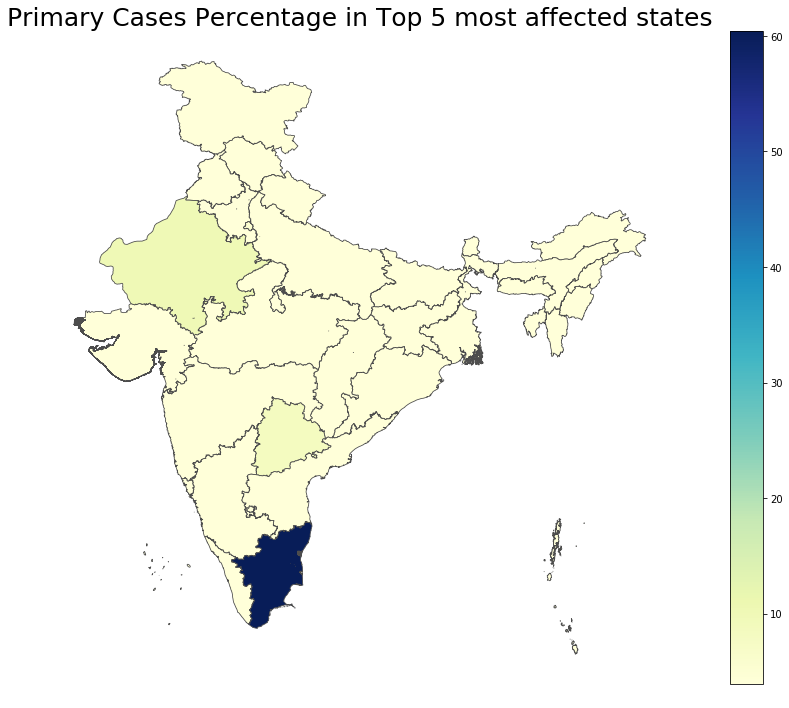

In [18]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Primary Cases Percentage in Top 5 most affected states', fontdict={'fontsize': '25', 'fontweight' : '3'})
Primary_map.plot(column='Primary Cases Percent', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.3', legend=True)
fig.savefig("Primary_Percentage.png", dpi=100)
pcase

Joining the Shape file map of india with the scase dataframe to prepare it for plotting

In [19]:
Secondary_map= map_df.set_index('st_nm').join(scase.set_index('detected_state'))

Plotting scase on the map

NameError: name 'Secondary_map' is not defined

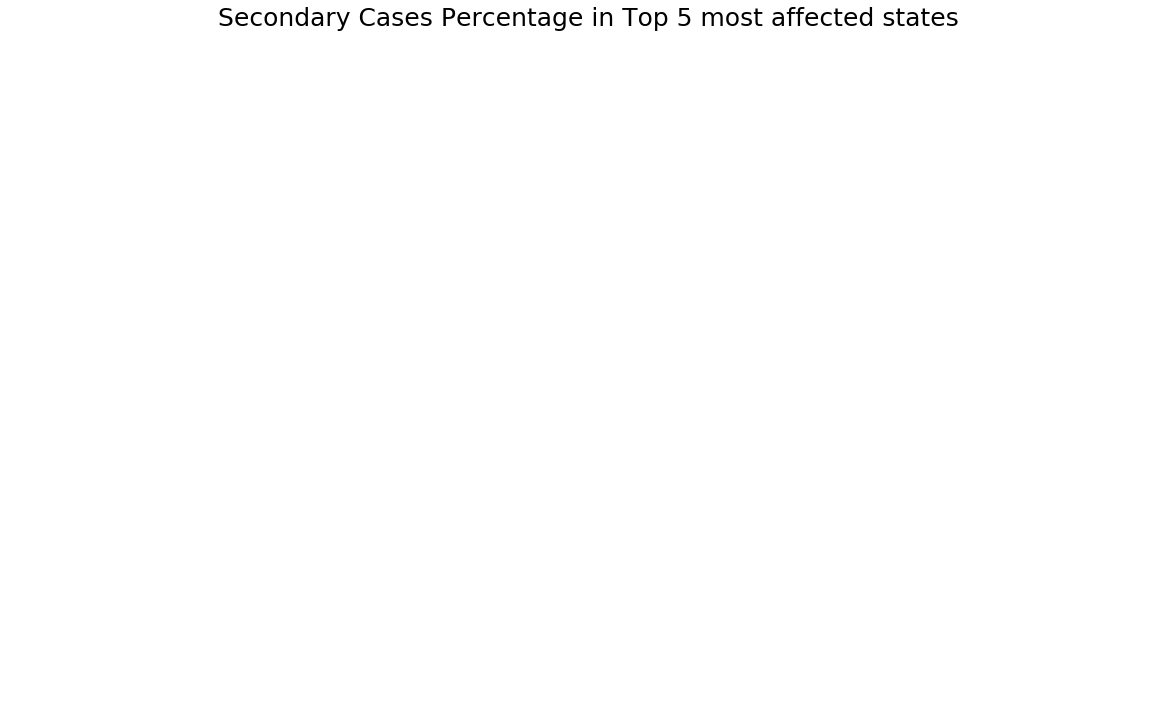

In [20]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Secondary Cases Percentage in Top 5 most affected states', fontdict={'fontsize': '25', 'fontweight' : '3'})
Secondary_map.plot(column='Secondary Cases Percent', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.3', legend=True)
fig.savefig("Secondary_Percentage.png", dpi=100)
scase

Joining the Shape file map of india with the tcase dataframe to prepare it for plotting

In [21]:
Tertiary_map= map_df.set_index('st_nm').join(tcase.set_index('detected_state'))

Plotting tcase on the map

,detected_state,Tertiary Cases Percent
0,Maharashtra,95.044473
1,Tamil Nadu,37.870472
2,Delhi,93.909192
3,Rajasthan,89.839572
4,Telangana,90.143737


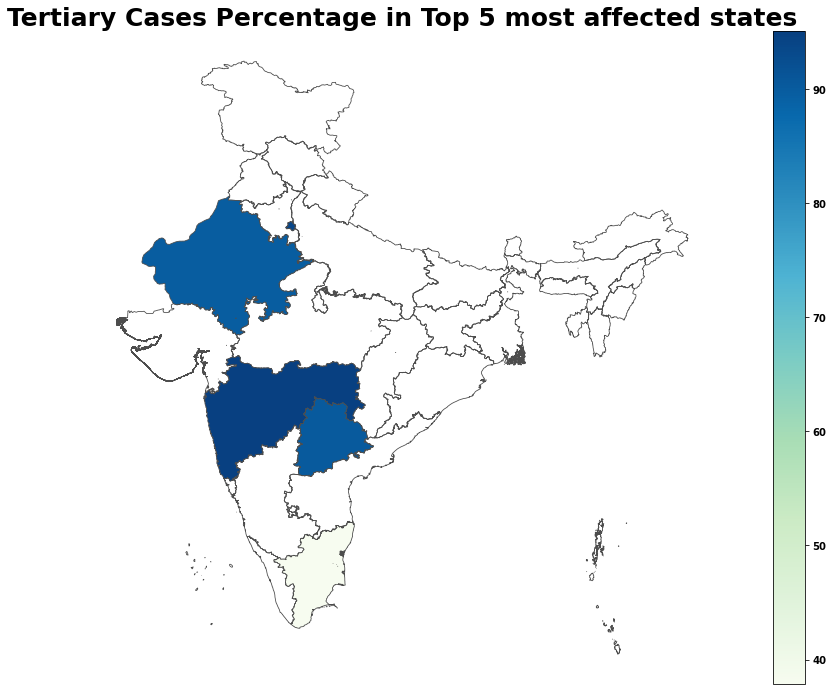

In [29]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Tertiary Cases Percentage in Top 5 most affected states', fontdict={'fontsize': '25', 'fontweight' : '3'})
Tertiary_map.plot(column='Tertiary Cases Percent', cmap='GnBu', linewidth=0.8, ax=ax, edgecolor='0.3', legend=True)
fig.savefig("Tertiary_Percentage.png", dpi=100)
tcase